# a4 Jupyter notebook

Meixian Wu <a href="mailto:meixianw@usc.edu">meixianw@usc.edu</a>

In [3]:
!pwd

/Users/meixianwu-i/Documents/School/DSCI553/a4-mxwu3157


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
percipitation = pd.read_csv('datasets/precipitation1.csv')
prec_india = percipitation[percipitation.Country == 'India']

prec_india.head()

,Country,Year,Value,Value Footnotes,Unit
0,France,1999,5.832247e+05,NaN,million cubic metres
1,Germany,1999,2.940000e+05,NaN,million cubic metres
2,Iraq,1999,7.822100e+04,NaN,million cubic metres
3,Maldives,1999,7.947600e+02,NaN,million cubic metres
4,Russian Federation,1999,9.761421e+06,NaN,million cubic metres


In [80]:
prec_india.describe()

,Year,Value,Value Footnotes
count,10.00000,1.000000e+01,0.0
mean,2008.50000,3.728700e+06,NaN
std,3.02765,2.885466e+05,NaN
min,2004.00000,3.136000e+06,NaN
25%,2006.25000,3.594750e+06,NaN
50%,2008.50000,3.746500e+06,NaN
75%,2010.75000,3.962250e+06,NaN
max,2013.00000,4.085000e+06,NaN


Loaded in the precipitation datasets, and choose the India subset. We found that the time range is 2004-2013.

In [101]:
argri = pd.read_csv('datasets/agriculture.csv')
argri = argri[(2004<=argri['Year']) & (argri['Year']<=2013)]
argri.head()

,Country,Element,Year,Unit,Value,Value Footnotes
6,India,Gross Production Index Number (2014-2016 = 100),2013,index,97.44,Fc
7,India,Gross Production Index Number (2014-2016 = 100),2012,index,93.52,Fc
8,India,Gross Production Index Number (2014-2016 = 100),2011,index,91.77,Fc
9,India,Gross Production Index Number (2014-2016 = 100),2010,index,86.26,Fc
10,India,Gross Production Index Number (2014-2016 = 100),2009,index,79.34,Fc


In [98]:
argri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          59 non-null     object 
 1   Element          59 non-null     object 
 2   Year             59 non-null     int64  
 3   Unit             59 non-null     object 
 4   Value            59 non-null     float64
 5   Value Footnotes  59 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.9+ KB


Loaded in the Gross Production Index Number of the agriculture focus for India, and choose the India subset from 2004 to 2013. 

In [102]:
sea_level = pd.read_csv('datasets/epa-sea-level_csv.csv')
sea_level.Year = pd.to_datetime(sea_level.Year)
sea_level.Year = pd.DatetimeIndex(sea_level['Year']).year
sea_level = sea_level[(2004<=sea_level['Year']) & (sea_level['Year']<=2013)]
sea_level.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365


In [103]:
sea_level.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,10.00000,10.000000,10.000000,10.000000,10.000000
mean,2008.50000,8.450787,8.157874,8.743701,7.968553
std,3.02765,0.581112,0.559528,0.603445,0.345646
min,2004.00000,7.740157,7.464567,8.015748,7.507933
25%,2006.25000,7.937008,7.662402,8.211614,7.698602
50%,2008.50000,8.468504,8.194882,8.742126,7.976860
75%,2010.75000,8.948819,8.621063,9.247047,8.105496
max,2013.00000,9.326772,8.992126,9.661417,8.546648


Loaded in the dataset Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015. This data contains "cumulative changes in sea level for the world’s oceans since 1880, based on a combination of long-term tide gauge measurements. Chose the subset from 2004 to 2013.

Then joined the three datasets on Year, and performed normalizations to make sure the are in same range. 

In [121]:
comb = argri[['Year','Value']].merge(prec_india[['Year','Value']], on  = 'Year' , how='inner')
comb = comb.merge(sea_level[['Year','CSIRO Adjusted Sea Level']],on  = 'Year' , how='inner' )

cols = ['Year','agriculture_index','percipitation','sea_level']
years = list(comb.Year)
comb.columns = cols
comb.set_index('Year')

from sklearn import preprocessing

x = comb.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
comb = pd.DataFrame(x_scaled, columns = cols, index = years)
comb['Year'] = years

comb

,Year,agriculture_index,percipitation,sea_level
2013,2013,1.000000,1.000000,0.781638
2012,2012,0.875119,0.348788,1.000000
2011,2011,0.819369,0.561644,0.771712
2010,2010,0.643836,0.898841,0.732010
2009,2009,0.423383,0.000000,0.533499
2008,2008,0.471169,0.566913,0.384615
2007,2007,0.440268,0.786091,0.161290
2006,2006,0.238292,0.719705,0.111663
2005,2005,0.115323,0.906217,0.002481
2004,2004,0.000000,0.457323,0.000000


## India statistical trends 2004-2013 (Agriculture GPI, Percipitation, and Sea Level)

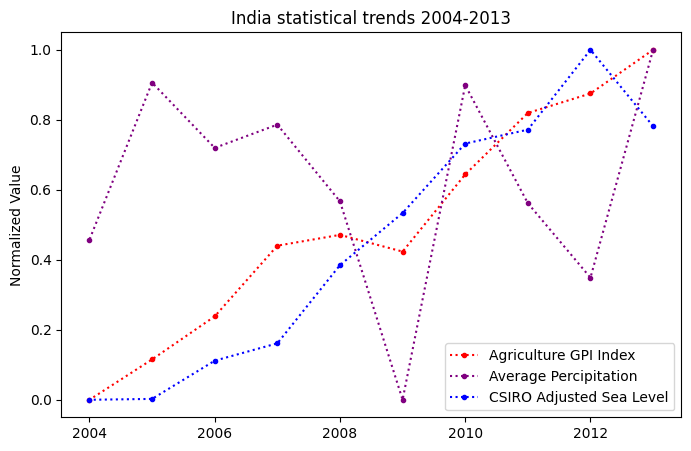

In [126]:
plt.figure(figsize = (8, 5)) 

plt.plot(comb.Year, comb.agriculture_index, marker = '.', c = 'r', linestyle=':',  label="Agriculture GPI Index")
plt.plot(comb.Year, comb.percipitation, marker = '.', c = 'purple', linestyle=':',  label="Average Percipitation")
plt.plot(comb.Year, comb.sea_level, marker = '.', c = 'blue', linestyle=':',  label="CSIRO Adjusted Sea Level")
plt.xlabel('')
plt.ylabel('Normalized Value')
plt.title('India statistical trends 2004-2013')
plt.legend(loc="lower right")
plt.show()

Explanation: From the previous plot, we have determined that precipitation play a important role in entire water resouces, therefore We wanted to sea that whether  rain fall correlated with the Agruiculture GPI more or the Sea level correlated with Agruiculture GPI more. We hypothesis that sea level is another important factor to explore as India has also lots of rivers located. From the multi-line plot, we can see that the sea level has much more correlated trend with the agriculture GPI, which means that precipitation did not played an important role in agriculture of India. The correlation of sea level comfirmed our hypothesis. It is worth digging down later in the project to see what make the precipitation unuseful for agriculture, technology or environmental issu?

## Percentage of India Household accessible to safe drinking water

In [25]:
gw_quality = pd.read_csv('datasets/undergroundwater_sampling_info.csv', )
gw_quality.head()

,Sl. No.\n,Location\n,Identification\n,Source\n,"Depth, m\n",Water Use\n,Land Use/ Specific Activity\n,City
0,1,Sikandra\n,Opp. Getwell Hospital\n,HP\n,18,Drinking\n,Residential\n,Arga
1,2,Khandari\n,Police Chowki\nCompound\n,HP\n,24,Cloth washing\n,Residential\n,Arga
2,3,Lohamandi\n,Saiyad Para Ground\n,HP\n,30,Drinking\n,Residential/ Slaughtering\n,Arga
3,4,Shahganj\n,Rui ki mandi Chauraha\n,HP\n,27,Drinking\n,Residential\n,Arga
4,5,Sultanpura\n,Jiva Ram Temple\n,HP\n,27,Drinking\n,Residential\n,Arga


In [58]:
gw_quality.City.unique()

array(['Arga', 'Meerut', 'Coimbatore', 'Chennai', 'Madurai', 'Vijaywada'],
      dtype=object)

In [130]:
drinking_water = pd.read_csv('datasets/access_to_safe_drinking_water_in_households_in_india.csv')
drinking_water.head()

,S. N.,States,Total,Rural,Urban
0,1,Andaman & Nicobar Islands,76.7,66.8,97.8
1,2,Andhra Pradesh,80.1,76.9,90.2
2,3,Arunachal Pradesh,77.5,73.7,90.7
3,4,Assam,58.8,56.8,70.4
4,5,Bihar,86.6,86.1,91.2


In [31]:
import seaborn as sns

Text(0.5, 1.0, 'Percentage of India Household accessible to safe drinking water in 2001')

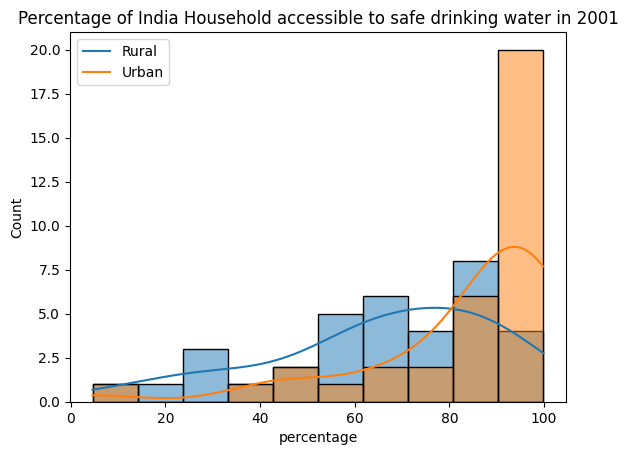

In [141]:
sns.histplot(data=drinking_water, x="Rural", kde=True, bins=10, label='Rural')
sns.histplot(data=drinking_water, x="Urban", kde=True, bins=10, label='Urban')
plt.legend(['Rural','Urban'])
plt.xlabel('percentage' )
plt.title('Percentage of India Household accessible to safe drinking water in 2001')

The dataset used is the percentage of the India household with accessible to safe drinkng water in 2001. The overlayed histogram of Rural area and Urban area shown the distribution of the percentage respectively. We can see that Over half of the states has nearly over 90% of safe drinking water coverage, averaged around 95%. But for Rural area, the mean is located around 75% coverage. This means that there is slightly a imbalance of water supply between rural and urban area. We will explore the correlation later in observable notebook

## Percentage of India Household accessible to safe drinking water By Decade

In [144]:
drinking_water_decade = pd.read_csv('datasets/drinking_water_by_decade.csv')
drinking_water_decade.head()

,States,Decade,Value
0,Andaman & Nicobar Islands,2001 (Sum),76.7
1,Andaman & Nicobar Islands,1991 (Sum),67.9
2,Andaman & Nicobar Islands,1981 (Sum),51.6
3,Andhra Pradesh,2001 (Sum),80.1
4,Andhra Pradesh,1991 (Sum),55.1


Text(0.5, 1.0, 'Percentage of India Household accessible to safe drinking water By Decade')

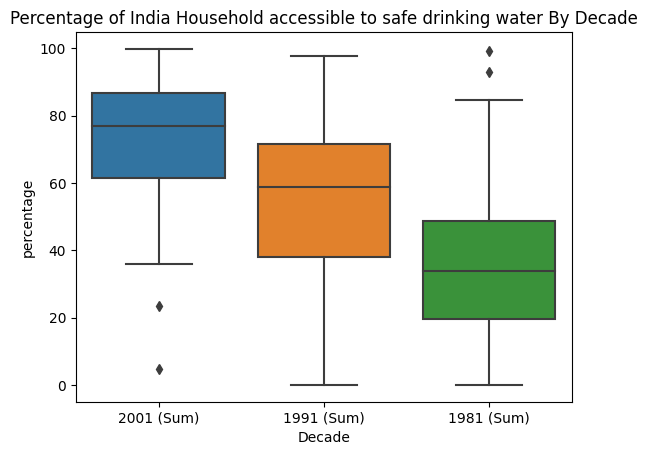

In [146]:
sns.boxplot(x='Decade', y='Value', data=drinking_water_decade)
plt.ylabel('percentage' )
plt.title('Percentage of India Household accessible to safe drinking water By Decade')

We unpivot the water coverage dataset and get the total percentage of each states in the three decades 2001, 1991, and 1981. The boxplot shown that there is a significant increase in the safe drinking water coverage from 1981 to 2001. There is a significant improvment in the low development area, as the first quartile of 1991 and 1981 were located at 0%, yet in 2001, the first quartile boosted to nearly 40%, which is a big increase. The gap of water coverage between different areas under different development stage are getting closer, seen from the box height.  